In [ ]:
# dataset from https://datacatalog.worldbank.org/dataset/world-development-indicators

feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = []

# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)


In [ ]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

# Print rs_fxn
print(rs_fxn)

In [ ]:
row_lists = []

# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names,sublist) for sublist in row_lists]

# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])

In [ ]:
# Import the pandas package
import pandas as pd

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)

# Print the head of the DataFrame
print(df.head())


In [ ]:
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

In [ ]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

In [ ]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

In [ ]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('ind_pop.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

In [ ]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

In [ ]:
import matplotlib.pyplot as plt

# Code from previous exercise
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(0.01*entry[0]*entry[1]) for entry in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

In [ ]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Concatenate DataFrame chunk to the end of data: data
    data = pd.concat([data,df_pop_ceb])

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

### Writing an iterator to load data in chunks (5)
This is the last leg. You've learned a lot about processing a large dataset in chunks. In this last exercise,
you will put all the code for processing the data into a single function so that you can reuse the code without
having to rewrite the same things all over again.

You're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed,
and the country code of the rows you want to process in the dataset.

Because all of the previous code you've written in the previous exercises will be housed in plot_pop(),
calling the function already does the following:

* Loading of the file chunk by chunk,
* Creating the new column of urban population values, and
* Plotting the urban population data.

That's a lot of work, but the function now makes it convenient to repeat the same process for whatever
file and country code you want to process and visualize!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas
and matplotlib.pyplot has been imported as pd and plt respectively for your use.

After you are done, take a moment to look at the plots and reflect on the new skills you have acquired.
The journey doesn't end here! If you have enjoyed working with this data, you can continue exploring
it using the pre-processed version available on Kaggle

C:\Users\vicfa\AppData\Local\Temp\ipykernel_8936\2774193764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\vicfa\AppData\Local\Temp\ipykernel_8936\2774193764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\vicfa\AppData\Local\Temp\ipykernel_8936\2774193764.py:26: SettingWithCopyWarning: 
A value is try

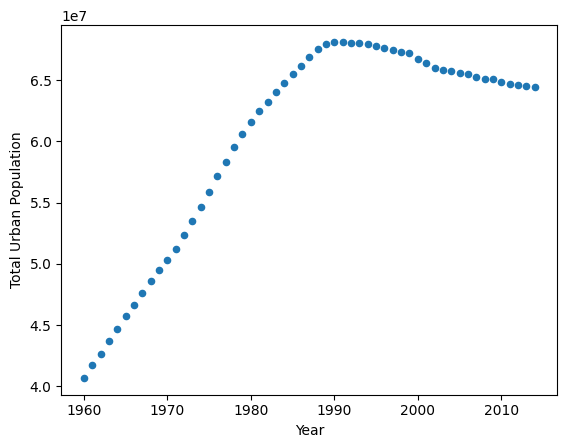

C:\Users\vicfa\AppData\Local\Temp\ipykernel_8936\2774193764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\vicfa\AppData\Local\Temp\ipykernel_8936\2774193764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\vicfa\AppData\Local\Temp\ipykernel_8936\2774193764.py:26: SettingWithCopyWarning: 
A value is try

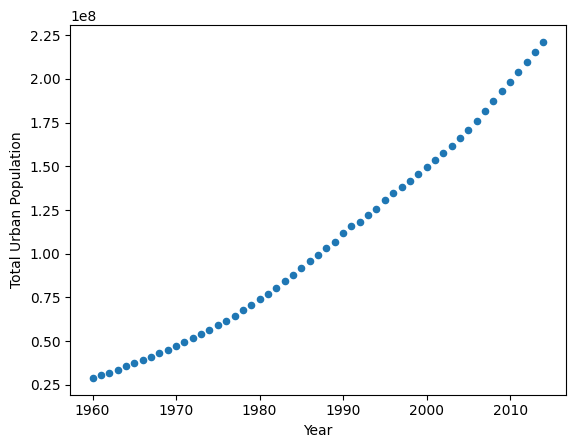

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
        
        # Concatenate DataFrame chunk to the end of data: data
        data = pd.concat([data, df_pop_ceb])

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop('world_ind_pop_data.csv', 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop('world_ind_pop_data.csv', 'ARB')